In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [100]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [95]:
june_over_perc = ts((june_over$series/june_over$total)[49:(24*30)], frequency=24)
june_under_perc = ts((june_under$series/june_under$total)[49:(24*30)], frequency=24)

In [91]:
ut = sum(june_under$series)

In [92]:
 ot = sum(june_over$series)

In [93]:
ut/(ut+ot)

[1] 0.3104449

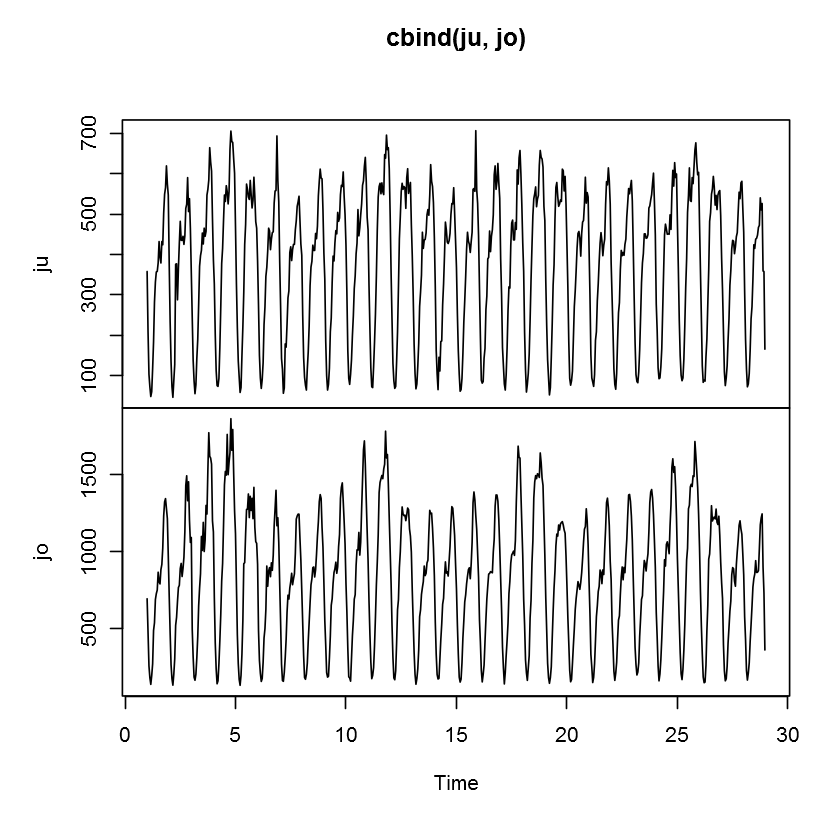

In [103]:
plot.ts(cbind(ju, jo))

In [104]:
o.1 = as.numeric(window(jo, start=c(1, 1), end= c(7, 24)))
o.2 = as.numeric(window(jo, start=c(8, 1), end= c(14, 24)))
o.3 = as.numeric(window(jo, start=c(15, 1), end= c(21, 24)))
o.4 = as.numeric(window(jo, start=c(22, 1), end= c(28, 24)))
u.1 = as.numeric(window(ju, start=c(1, 1), end= c(7, 24)))
u.2 = as.numeric(window(ju, start=c(8, 1), end= c(14, 24)))
u.3 = as.numeric(window(ju, start=c(15, 1), end= c(21, 24)))
u.4 = as.numeric(window(ju, start=c(22, 1), end= c(28, 24)))

In [105]:
weeks = data.frame(o.1, o.2, o.3, o.4, u.1, u.2, u.3, u.4)

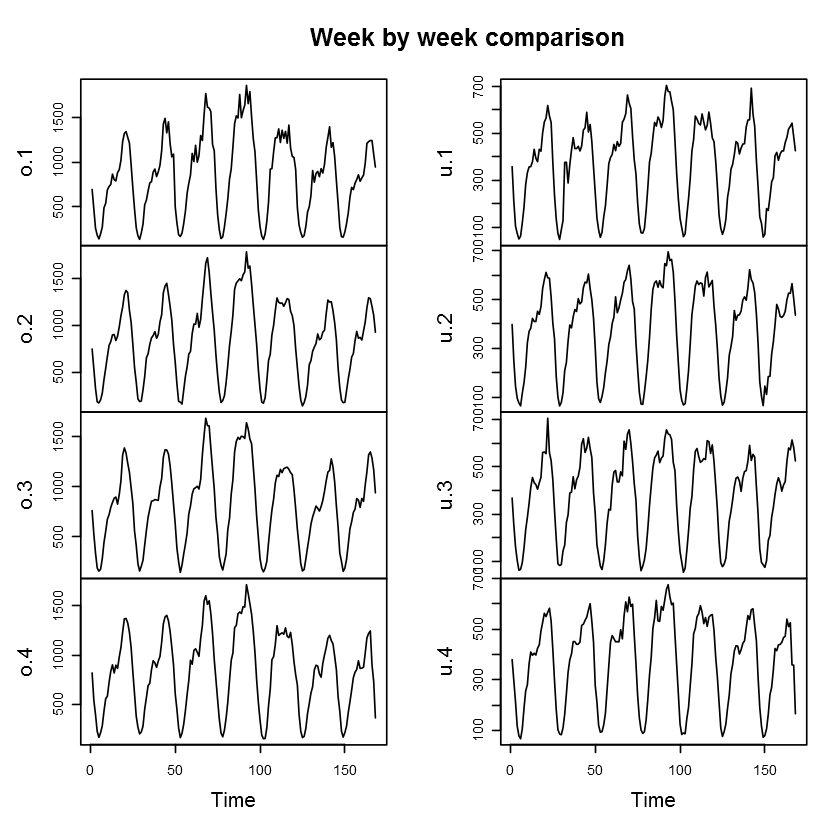

In [106]:
plot.ts(weeks, main='Week by week comparison')

In [108]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


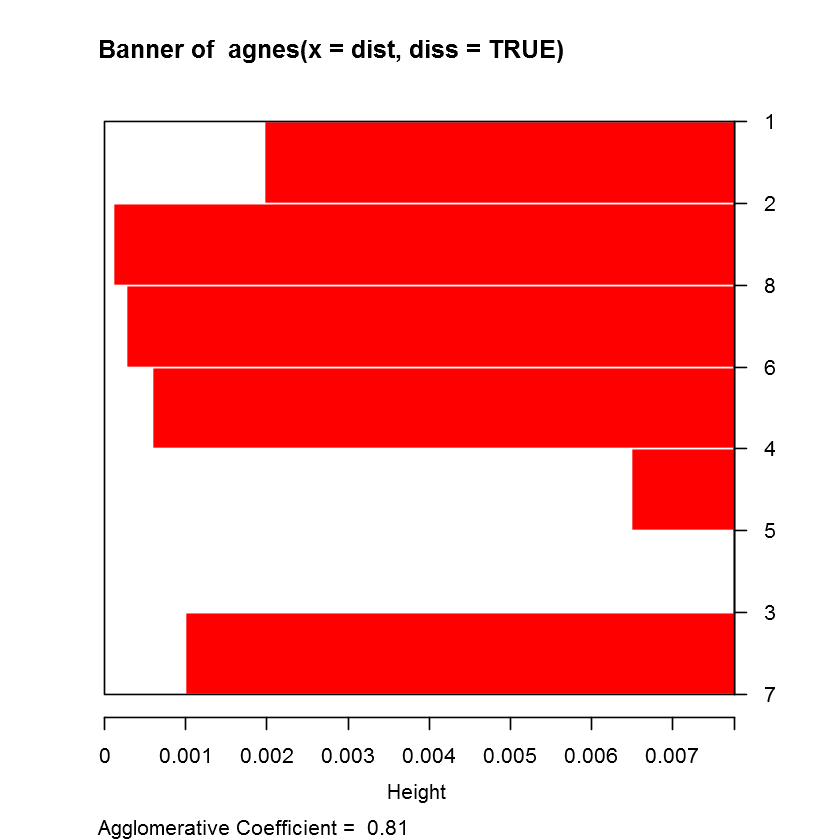

Medoids:
     ID  
[1,]  8 8
[2,]  7 7
Clustering vector:
[1] 1 1 2 1 1 1 2 1
Objective function:
      build        swap 
0.001303222 0.001303222 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

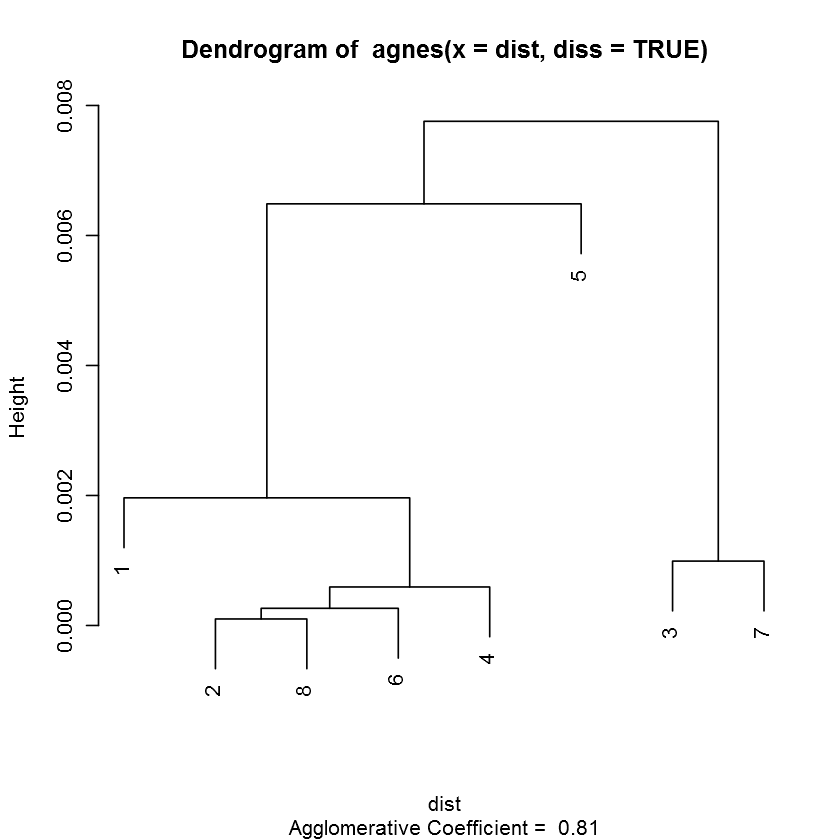

In [111]:
dist = dissimilarity(as.matrix(weeks), phase_dist(7))
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

In [119]:
dissimilarity(as.matrix(weeks), phase_dist(4))

0.00000000,0.00568378,0.21376535,0.18644025,0.16955936,0.10654738,0.39818012,0.15557024
0.00568378,0.00000000,0.21944913,0.18075647,0.16387558,0.10086360,0.40386390,0.14988646
2.137654e-01,2.194491e-01,2.902639e-21,4.002056e-01,3.833247e-01,3.203127e-01,1.844148e-01,3.693356e-01
0.18644025,0.18075647,0.40020560,0.00000000,0.01688089,0.07989287,0.41537963,0.03087001
0.16955936,0.16387558,0.38332471,0.01688089,0.00000000,0.06301198,0.43226052,0.01398913
0.10654738,0.10086360,0.32031273,0.07989287,0.06301198,0.00000000,0.49527250,0.04902286
0.3981801,0.4038639,0.1844148,0.4153796,0.4322605,0.4952725,0.0000000,0.4462496
0.15557024,0.14988646,0.36933559,0.03087001,0.01398913,0.04902286,0.44624965,0.00000000


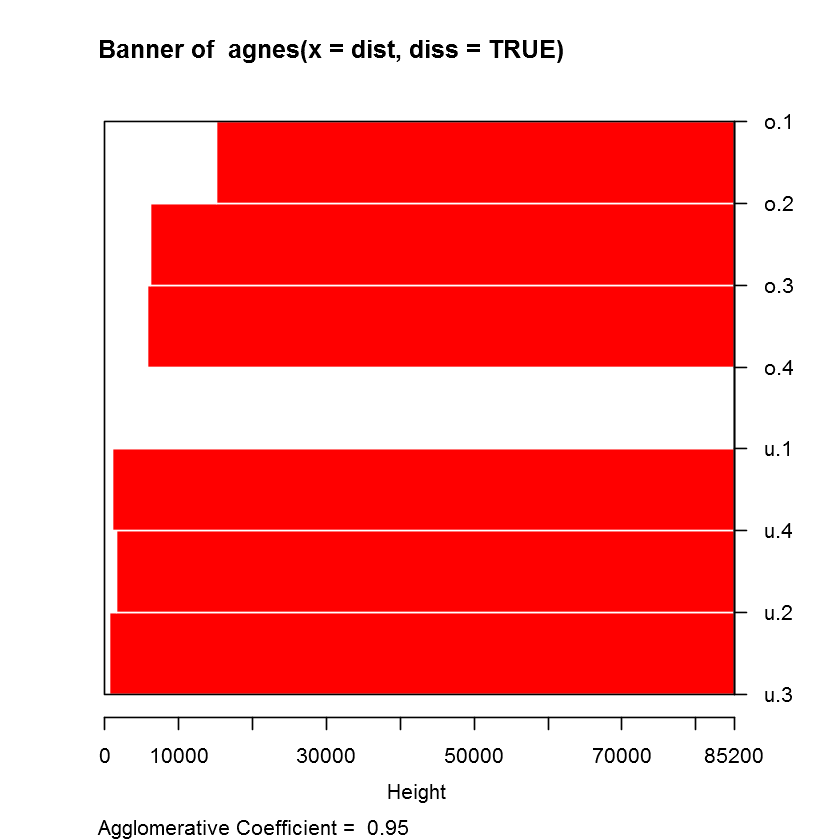

Medoids:
     ID       
[1,] "2" "o.2"
[2,] "7" "u.3"
Clustering vector:
o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 
Objective function:
   build     swap 
3461.195 3440.976 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

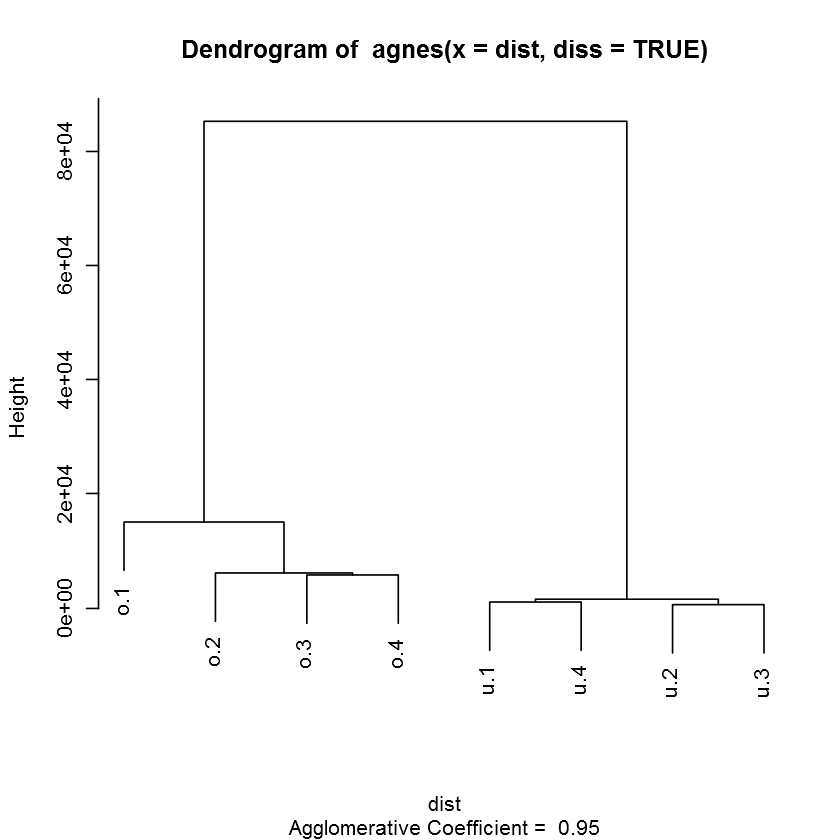

In [110]:
dist = diss(weeks, METHOD='PER')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

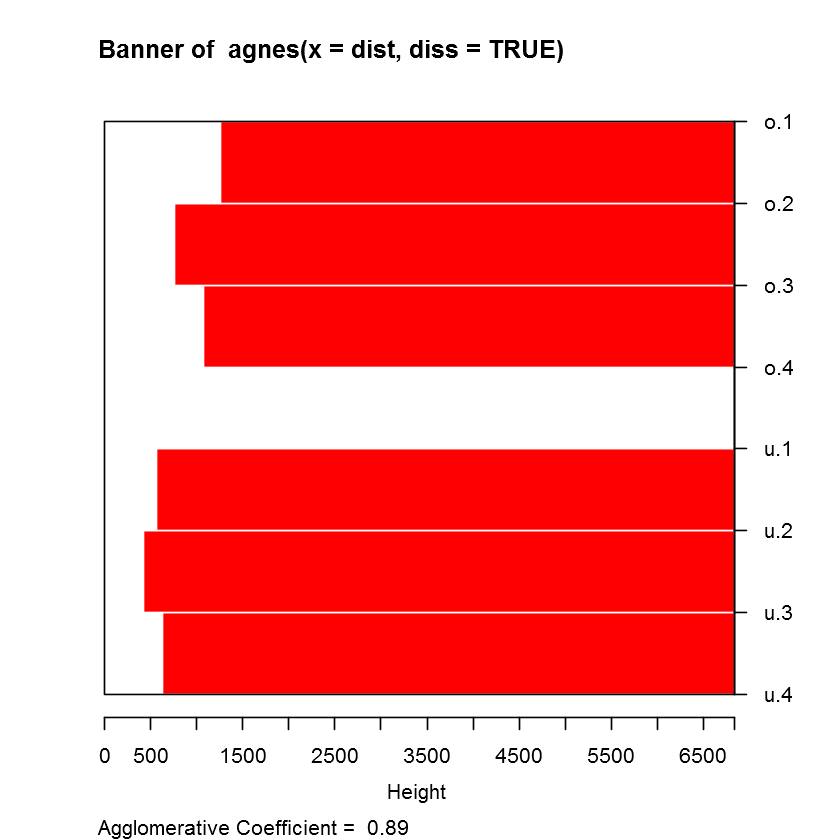

Medoids:
     ID       
[1,] "2" "o.2"
[2,] "6" "u.2"
Clustering vector:
o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 
Objective function:
   build     swap 
546.1625 546.1625 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

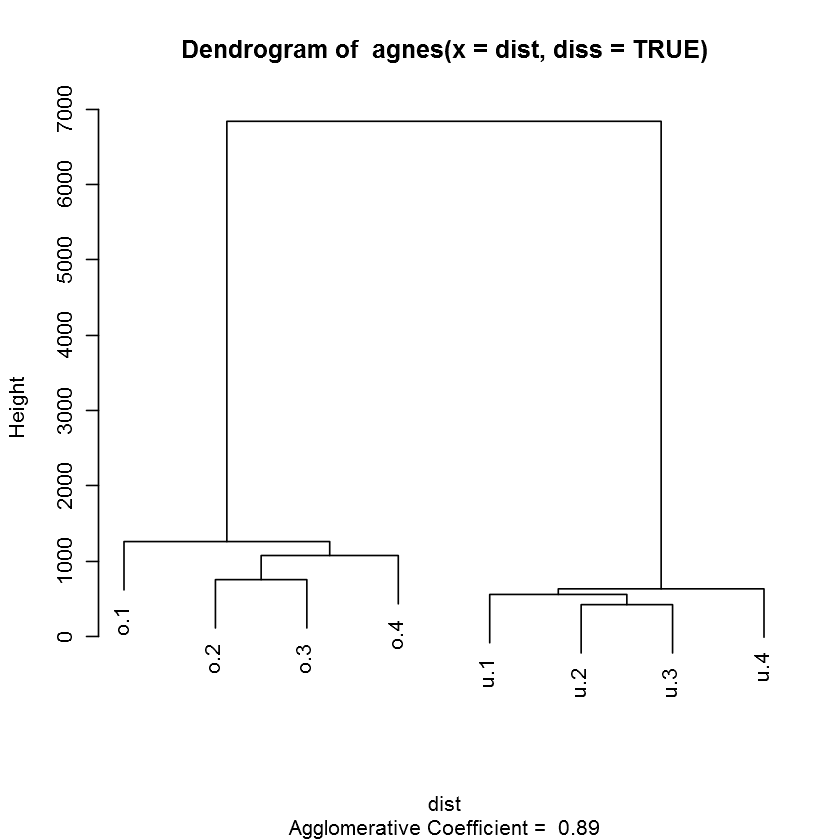

In [109]:
dist = diss(weeks, METHOD='EUCL')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

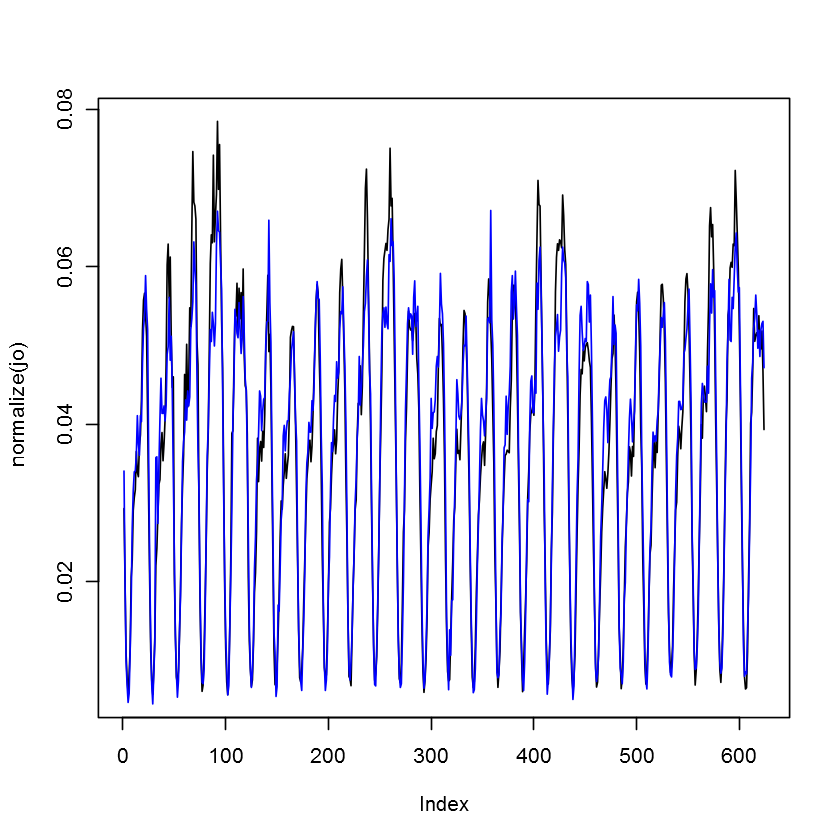

In [79]:
plot(normalize(jo), type='l')
lines(normalize(ju), col='blue')

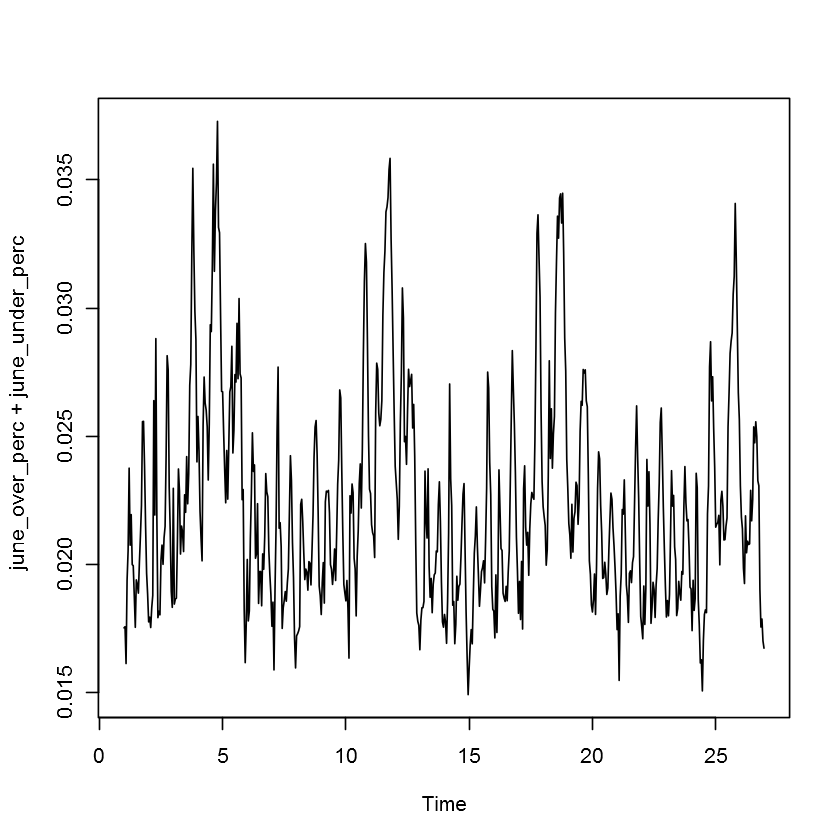

In [13]:
plot.ts(june_over_perc + june_under_perc)

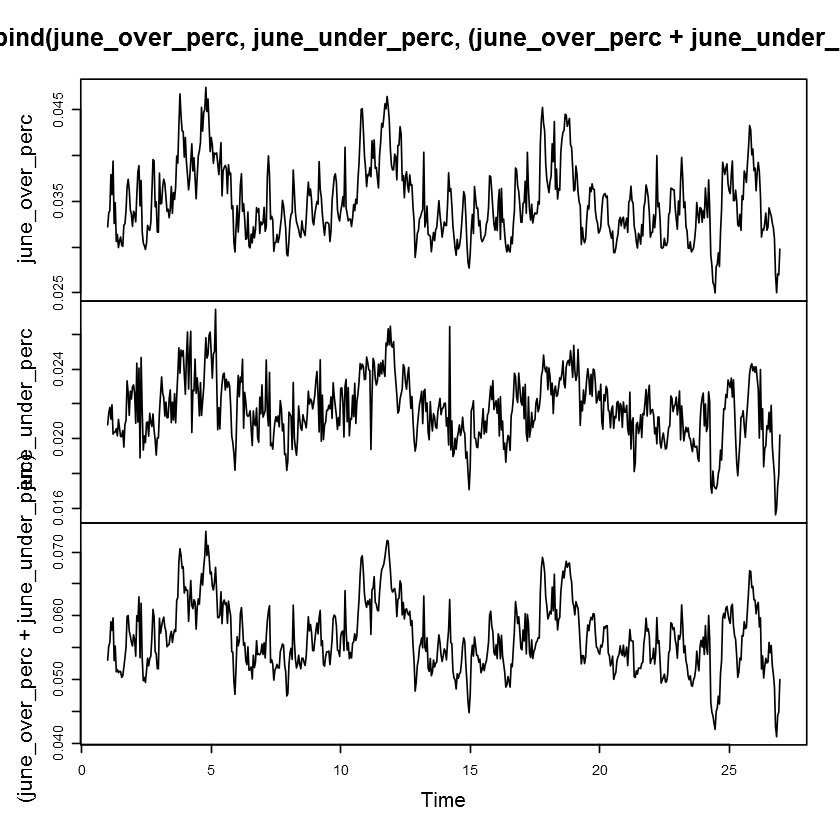

In [62]:
plot.ts(cbind(june_over_perc, june_under_perc, (june_over_perc+june_under_perc)))

In [101]:
jo = ts(june_over$series[49:(24*30)], frequency=24)
ju = ts(june_under$series[49:(24*30)], frequency=24)

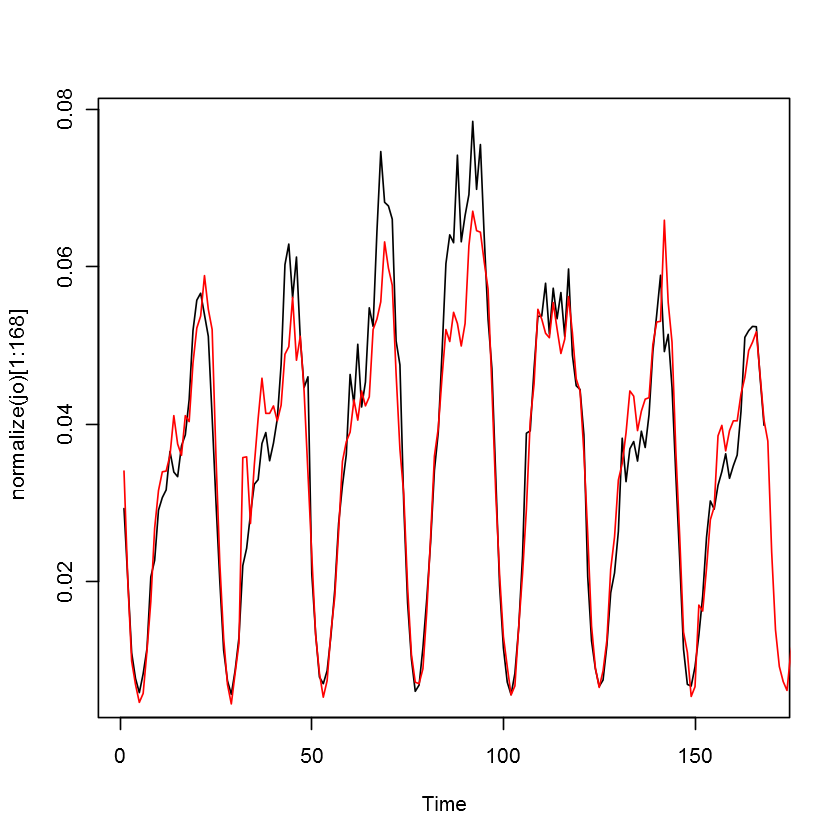

In [63]:
plot.ts(normalize(jo)[1:168])
lines(normalize(ju), col='red')

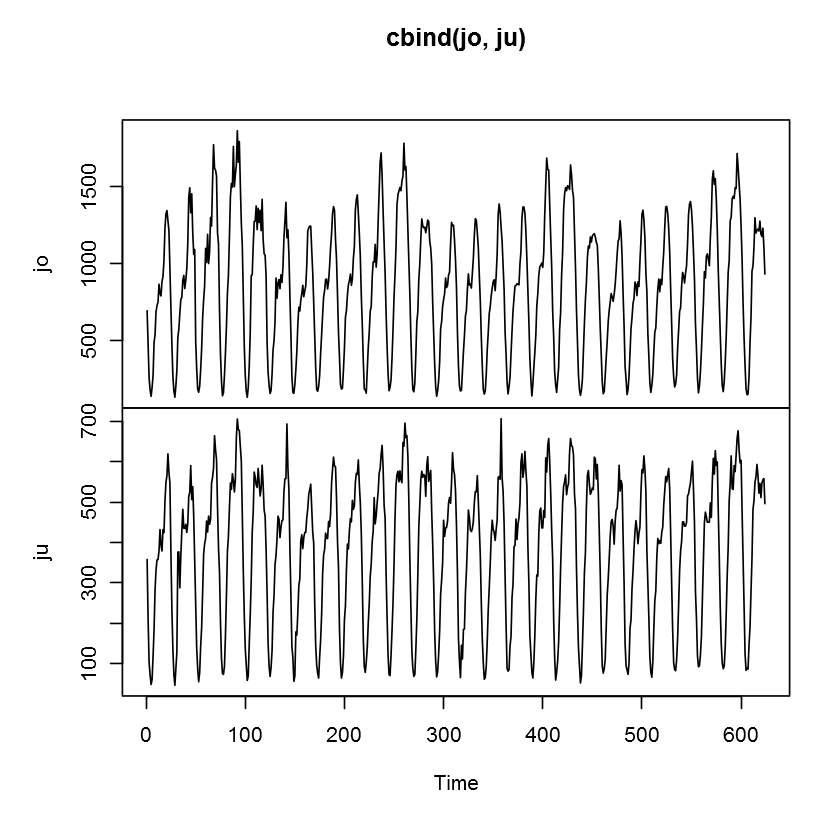

In [36]:
plot.ts(cbind(jo, ju))

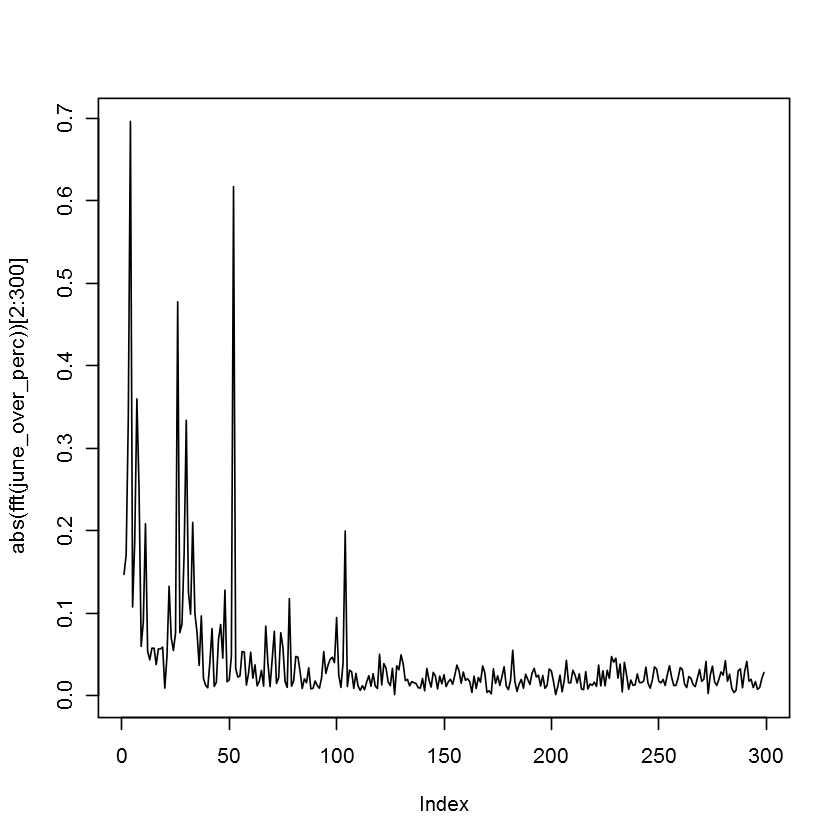

In [49]:
plot(abs(fft(june_over_perc))[2:300], type='l')

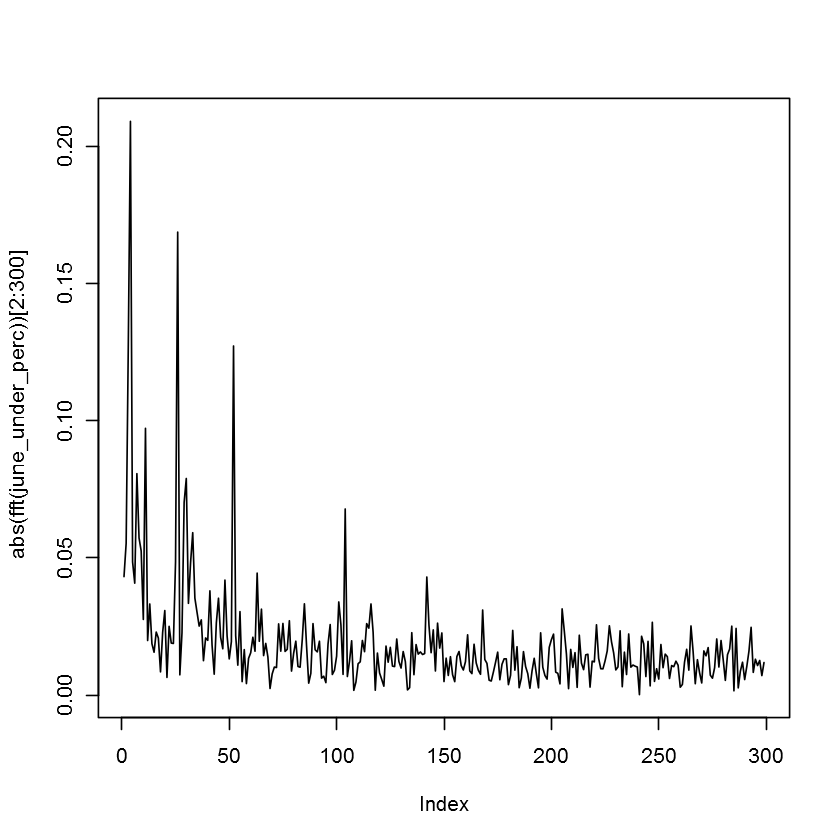

In [50]:
plot(abs(fft(june_under_perc))[2:300], type='l')

In [51]:
phase_dist(4)(jo, ju)

[1] 0.04430986

In [27]:
phase_dist <- function(freq){
    # gives dft phase distance function at a frequency
    return (function(ts1, ts2){
        # phase of freq from fft
        f1 = fft(ts1)[freq+1]
        f2 = fft(ts2)[freq+1]
        return (abs(Arg(f1/f2))/(2*pi))
        })
    
}

In [28]:
dissimilarity <- function(m_ts, f){
    # calc dissimilarity matrix of list of time series given a distance function
    n = ncol(m_ts)
    mdiss = matrix(nrow=n, ncol=n)
    for (i in 1:n){
        for (j in 1:n){
            mdiss[i, j] = f(m_ts[,i], m_ts[,j])
        }
    }
     return (mdiss)       
}

In [41]:
normalize <- function(ts){
    return(ts/norm(ts, type='2'))
}